In [41]:
## importing the necessary packages 
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
import math

In [42]:
### subroutine to plot the model as a grid
import matplotlib.pyplot as plt

def plot_grid(name):
    plt.rcParams['figure.figsize'] = [10,10]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(name)

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.5)
    plt.show()
    return

In [43]:
## defining the parameters of the model
m = 100 # years
n = 50 # number of grid points is n*n
recovery = 10 # time for destroyed land to recover
res = 2 # 2 km 
surf_area =  res*res #surface area of one pixel in km^2
melt_vol = 0 # initialzes melt volume to 0
ocean_level = [1] # initializes ocean level to reference point (1) 
beta = 210*10**(-6) # coefficient of volume expansion 
years = np.linspace(2025,2125, 101) # define the future years to look at

In [44]:
## create grid 
##############################  setup
ocean=np.array([14/255,0/255,117/255])   
shallowocean =np.array([116/255,132/255,252/255])
glacier=np.array([139/255, 232/255, 227/255]) ## ice on land (glacier)
icefloat=np.array([250/255,1,1])  ## sea ice  
land=np.array([0/255,122/255,65/255]) 
lowland=np.array([255/255,210/255,150/255])
destroyedland=np.array([1,0,0]) # for later
null = np.array([0,0,0])

geography={'ocean':ocean,'shallowocean':shallowocean,
           'glacier':glacier,'icefloat':icefloat,
           'land':land,'lowland':lowland,
           'destroyedland':destroyedland, 'null':null}

This is the initial set-up of the landform, before subjecting it to climate process:


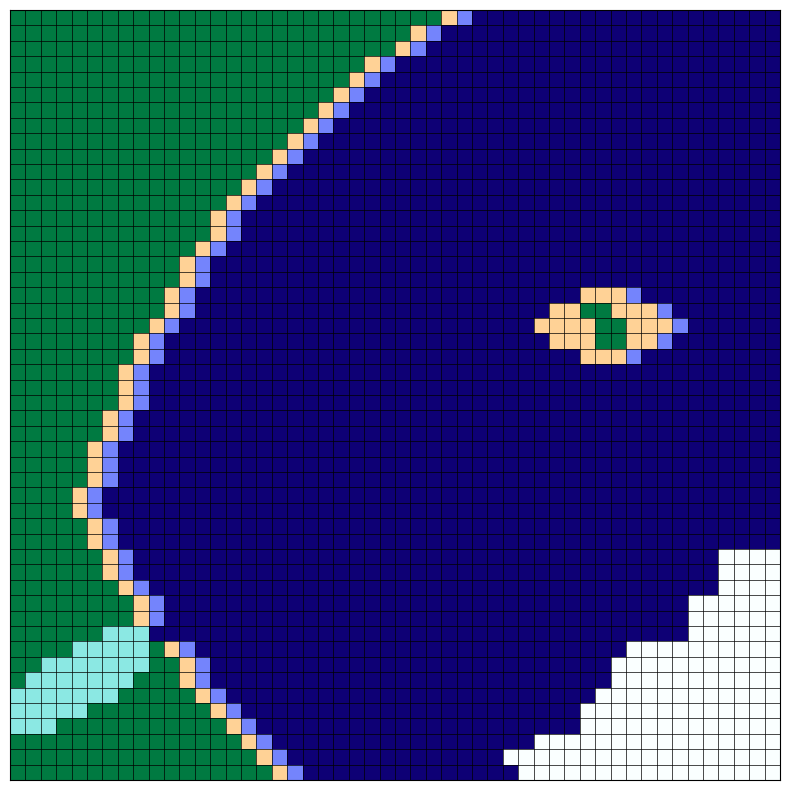

In [45]:
## draw earth

background=[[ocean]*n]*n
grid_colours=background.copy()
clim_model=np.array(grid_colours)  ## initializes the model to all ocean
#plot_grid(clim_model)

def is_equal(x,y,col):  ## checks if colour of a cell in the model grid is col
    if np.all(clim_model[x,y]==np.array(col)):
        return True
    return False

def create_island():
    for x in range(50):
        for y in range(50):
            if (x-20)**2/2+(y-38)**2/8<=2.3:
                clim_model[x,y]=lowland
    clim_model[20,38]=land
    clim_model[19,38]=land
    clim_model[21,38]=land
    clim_model[21,39]=land
    clim_model[20,39]=land
    clim_model[19,37]=land
    return

def create_arctic():
    for x in range(50):
        for y in range(50):
            if np.sin(y)+1.1*x+y+0.8*np.sin(2*x)>=86:
                clim_model[x,y]=icefloat
    return

def create_land1():               
    for x in range(50):
        for y in range(50):
            if (x-n)**2/4+(y-n)**2/3>=800:
                clim_model[x,y]=land
    return

create_land1()
   
for x in range(20,34):
    for y in range(50):
        if is_equal(x,y,ocean) \
        and (np.all(clim_model[x-1,y]==np.array(land)) \
        or np.all(clim_model[x,y-1]==np.array(land))):
            clim_model[x,y]=lowland

def create_land2():
    for x in range(50):
        for y in range(50):
            if (x-0)**2/4+(y-n)**2/3>=970:
                clim_model[x,y]=land
    return

create_land2()
            
for x in range(50):
    for y in range(50):
        if (x-43)**2+(x-43)*(y-4)+0.5*(y-4)**2<=5:
            clim_model[x,y]=glacier

for x in range(20,50):
    for y in range(50):
        if is_equal(x,y,ocean) \
        and (np.all(clim_model[x-1,y]==np.array(land)) \
        or np.all(clim_model[x,y-1]==np.array(land))):
            clim_model[x,y]=lowland

for x in range(50):
    for y in range(50):
        if is_equal(x,y,ocean) \
        and (np.all(clim_model[x-1,y]==np.array(land)) \
        or np.all(clim_model[x,y-1]==np.array(land))):
            clim_model[x,y]=lowland
            if y<49 and x<15:
                clim_model[x,y+1]=shallowocean
create_island()
                
for x in range(n):
    for y in range(n):
        if is_equal(x,y,ocean) \
        and (is_equal(x,y-1,lowland)):
            clim_model[x,y]=shallowocean

create_arctic()

## end draw earth
print('This is the initial set-up of the landform, before subjecting it to climate process:')
plot_grid(clim_model)

The predicted annual global emissions of CO2 in 2125 is 84021849720 tonnes.
The predicted annual global emissions of CO2 in 2100 is 72713682145 tonnes.


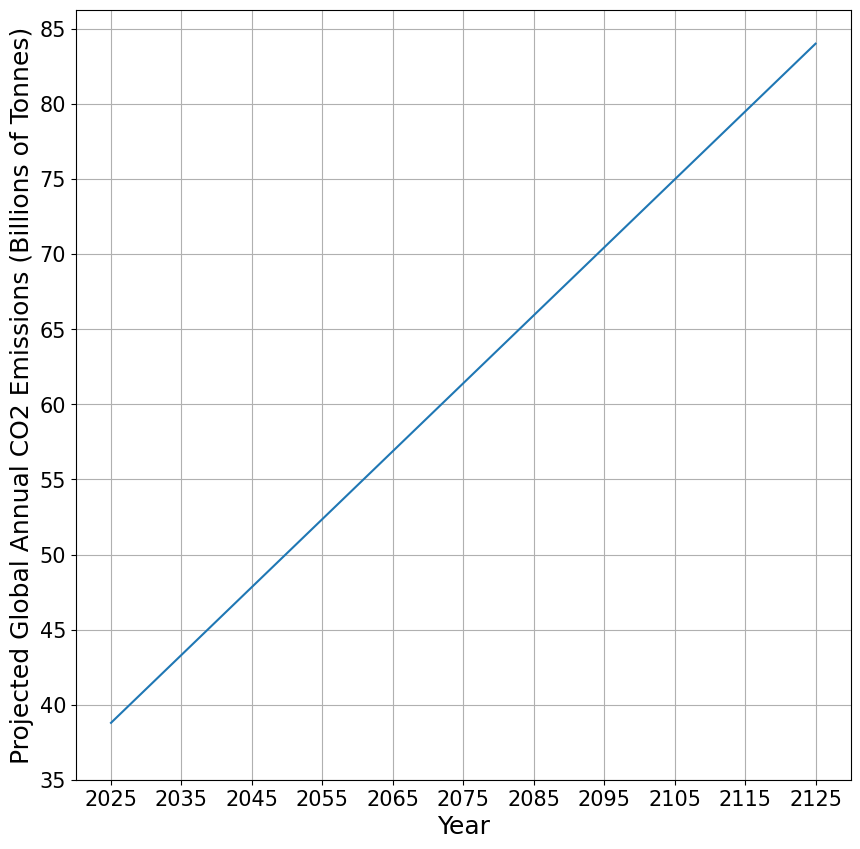

In [46]:
# regression of CO2 emissions on year
CO2_em_over_time=[]
def CO2_em(year):
    for i in range(len(year)):
        annual_CO2_emission = 452326703*(year[i]) - 877172394155 # based on regression 
        CO2_em_over_time.append(annual_CO2_emission)
    return CO2_em_over_time

CO2em = CO2_em(years) 

# Plot the projection
plt.plot(years,np.divide(CO2em,10**9)) # dividing by 10^9 converts to billions
plt.xlabel("Year", size = 18);
plt.xticks(range(2025,2135,10), size = 15)
plt.ylabel("Projected Global Annual CO2 Emissions (Billions of Tonnes)", size = 18);
plt.yticks(np.linspace(35,85,11), size = 15)
plt.grid()
plt.savefig('projectedco2') 
print('The predicted annual global emissions of CO2 in', int(years[m]) ,'is', int(CO2em[m]), 'tonnes.')
print('The predicted annual global emissions of CO2 in', int(years[75]) ,'is', int(CO2em[75]), 'tonnes.')

Based on the predicted annual global emissions of CO2 in 2125 , the projected atmospheric CO2 ppm is 571.7 ppm.
Based on the predicted annual global emissions of CO2 in 2100 , the projected atmospheric CO2 ppm is 532.0 ppm.


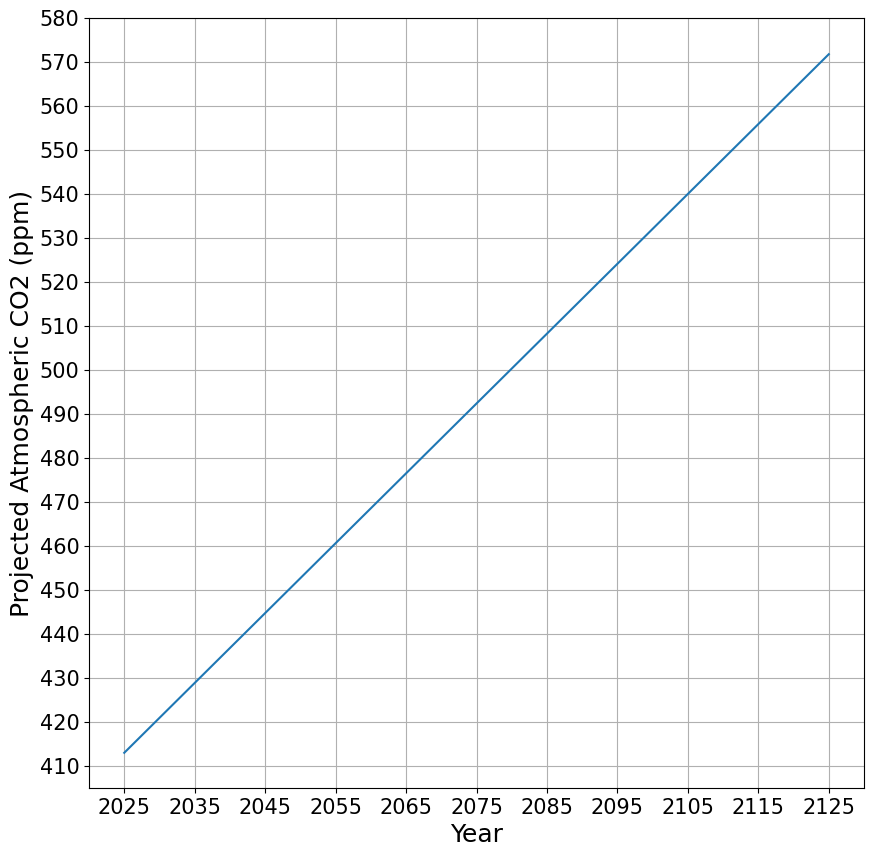

In [47]:
# co2 ppm regressed on co2 emissions
CO2_ppm_over_time=[]
def CO2_ppm(co2_em):
    for i in range(len(co2_em)):
        CO2_ppm = 0.0000000035091*co2_em[i] + 276.87
        CO2_ppm_over_time.append(CO2_ppm)
    return CO2_ppm_over_time

CO2ppm = CO2_ppm(CO2em)
plt.plot(years,CO2ppm) # dividing by 10^9 converts to billions
plt.xlabel("Year", size = 18);
plt.xticks(range(2025,2135,10), size = 15)
plt.ylabel("Projected Atmospheric CO2 (ppm)", size = 18);
plt.yticks(np.linspace(410, 580,18), size = 15)
plt.grid()
plt.savefig('projectedppm') 
print('Based on the predicted annual global emissions of CO2 in',int(years[m]),', the projected atmospheric CO2 ppm is', round(CO2ppm[m],1), 'ppm.')
print('Based on the predicted annual global emissions of CO2 in',int(years[75]),', the projected atmospheric CO2 ppm is', round(CO2ppm[75],1), 'ppm.')

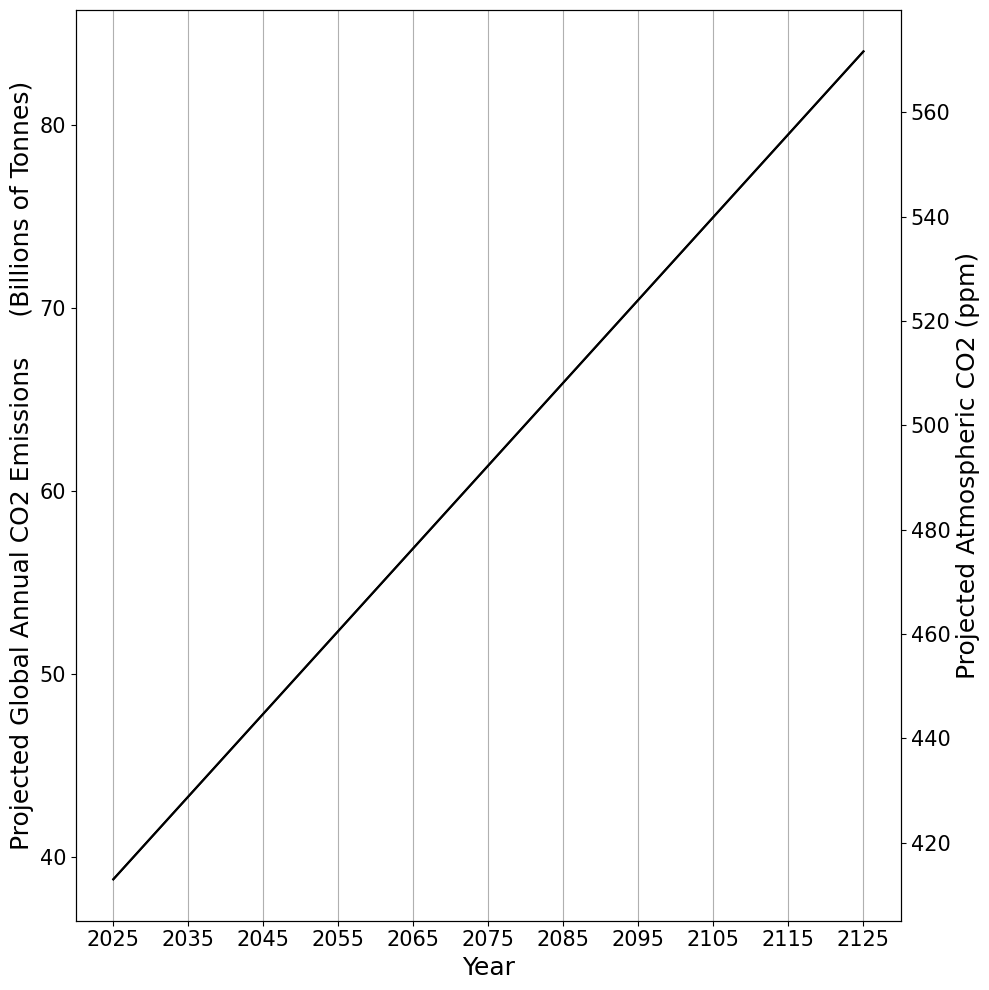

In [62]:
## Plotting CO2 emissions and atmospheric concentration together
fig, ax1 = plt.subplots()

color = 'black'
plt.xticks(range(2025,2135,10), size = 15)
ax1.set_xlabel('Year', size = 18)
ax1.set_ylabel('Projected Global Annual CO2 Emissions (Billions of Tonnes)', color=color, size = 18)
ax1.plot(years,np.divide(CO2em,10**9), color=color) 
ax1.tick_params(axis='y', labelcolor=color, labelsize = 15)
ax1.grid(axis = 'x')

ax2 = ax1.twinx()

color = 'black'
ax2.set_ylabel('Projected Atmospheric CO2 (ppm)', color=color, size = 18)
ax2.plot(years,CO2ppm, color=color) 
ax2.tick_params(axis='y', labelcolor=color, labelsize = 15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('projectedCO2') 
plt.show()


In [49]:
# temperature increase from atmospheric carbon dioxide
def temp(ghg):
    ghgtemp = []
    for i in range(len(ghg)):
        x = 0.012174*ghg[i] - 3.3956
        ghgtemp.append(x)
    return ghgtemp

tempGHG = temp(CO2ppm)

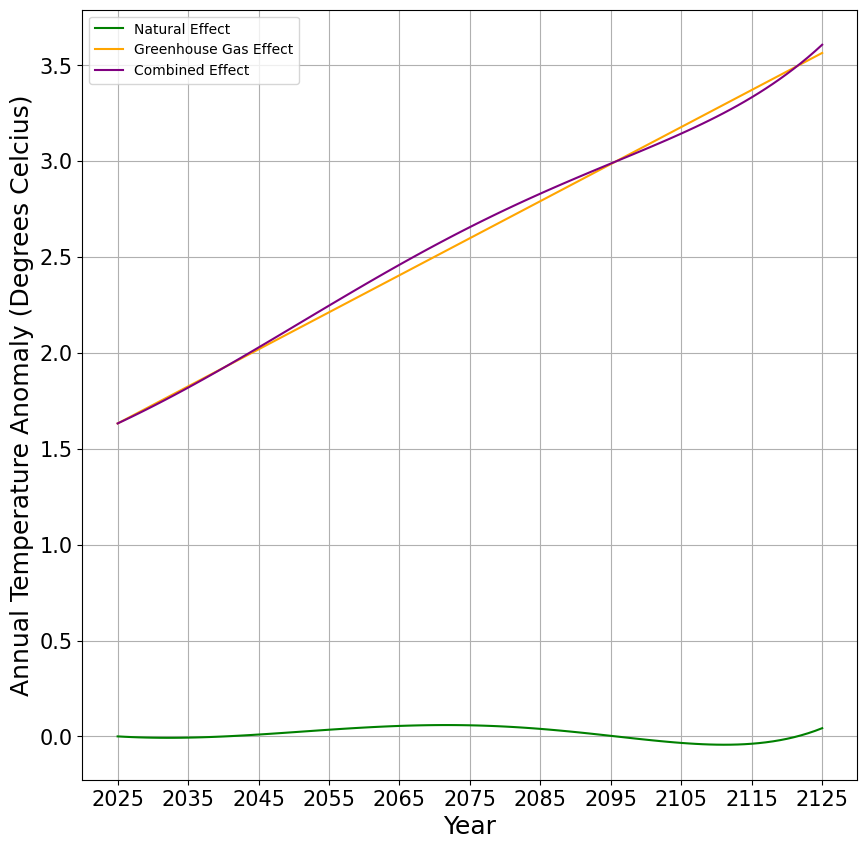

The projected annual temperature anomaly in degrees Celsius and reference period 1850-1859 is 3.607 with CO2 emissions contributing 3.564 degrees and natural effects contributing 0.043 degrees.
Average temperature anomaly for 2081 - 2100 is 2.909


In [50]:
## temperature increased due to solar and volcanic activity
nattemp_over_time=[]
def natural_effect(t):
    for i in range(len(years)):
        natural_temp = (2.788e-10)*(i**5)-3.017e-8*(i**4)-1.161e-6*(i**3)+0.0001648*(i**2)-0.002152*i
        nattemp_over_time.append(natural_temp) 
    return nattemp_over_time
    
nat_temp = natural_effect(m)

plt.plot(years, nat_temp, label = 'Natural Effect', color = 'green')
plt.plot(years, tempGHG, label = 'Greenhouse Gas Effect', color='orange')
plt.plot(years, np.add(tempGHG,nat_temp), label = 'Combined Effect', color = 'purple')
plt.xlabel("Year", size = 18);
plt.xticks(range(2025,2135,10), size = 15)
plt.ylabel("Annual Temperature Anomaly (Degrees Celcius)", size = 18);
plt.yticks(size = 15)
plt.legend()
plt.grid()
plt.savefig('tempanom') 
plt.show()
print('The projected annual temperature anomaly in degrees Celsius and reference period 1850-1859 is', round(np.add(tempGHG,nat_temp)[m],3), 'with CO2 emissions contributing', round(tempGHG[m],3), 'degrees and natural effects contributing', round(nat_temp[m],3) ,'degrees.')
print('Average temperature anomaly for', int(years[56] ),'-', int(years[75]), 'is', round(np.mean(np.add(tempGHG[56:75],nat_temp[56:75])),3))


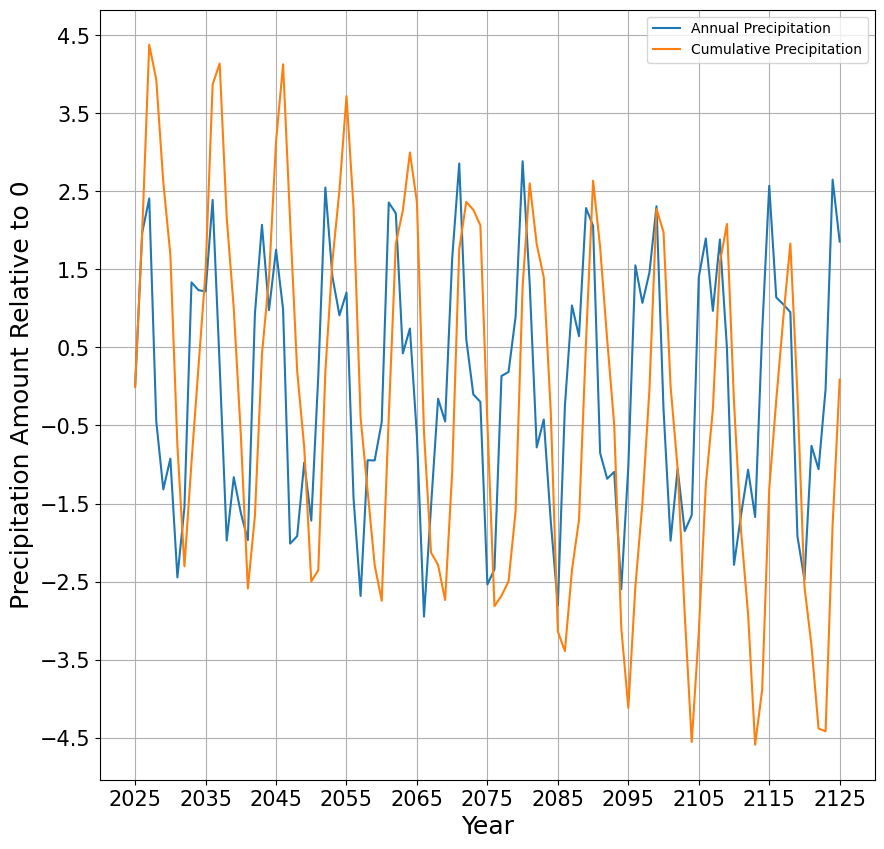

In [51]:
# hypothetical precipitation data
precip_init = 0
precip_over_time = []
precip_over_time.append(precip_init)
def precip(t):
    for i in range(t):
        precip_amt = np.sin(2*i)+2*np.cos(0.7*i)-0.03
        precip_over_time.append(precip_amt)
    return precip_over_time

def precip_intensity(t):
    precip(t)
    intensity_sum = [0]*(len(precip_over_time))
    for i in range(len(precip_over_time)):
        intensity_sum[i] = intensity_sum[i-1] + precip_over_time[i]
    return intensity_sum

precip_int = precip_intensity(m)
plt.plot(years, precip_over_time)
plt.plot(years, precip_int)
plt.legend(['Annual Precipitation','Cumulative Precipitation'])
plt.xlabel("Year", size = 18);
plt.xticks(range(2025,2135,10), size = 15)
plt.ylabel("Precipitation Amount Relative to 0", size = 18);
plt.yticks(np.linspace(-4.5,4.5,10), size = 15)
plt.grid()
plt.savefig('precip') 
plt.show()


In [52]:
def what_is(x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(clim_model[x,y]==np.array(v)):
            whatis=k
    return whatis

def what_is_general(which_model,x,y):  ##inquires about the colour (nature) of a cell in any grid
    for k,v in geography.items():
        if np.all(which_model[x,y]==np.array(v)):
            whatis=k
    return whatis


In [53]:
# Who are your neighbours function
## inquires about the nature of a cells surroundings
## PADDING
def padding(x):
    null1 = np.array([[null]*n])
    null2 = np.array([[null]]*(n+2))
    expand1 = np.concatenate((x, null1), axis = 0) #adds row to bottom
    expand2 = np.concatenate((null1, expand1), axis = 0) #adds row to top
    expand3 = np.concatenate((expand2, null2), axis = 1) #adds last col
    final = np.concatenate((null2, expand3), axis = 1) #adds first col
    return final

# using Moore neighbourhood
def moore(x, comp):
    y = padding(x)
    glacier_count = np.zeros((n+2,n+2))
    for i in range(1,n+1):
        for j in range(1,n+1):
            if what_is_general(y,i-1,j-1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i-1,j)==comp: 
                glacier_count[i,j] += 1
            if what_is_general(y,i-1,j+1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i,j+1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i+1,j+1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i+1,j)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i+1,j-1)==comp:
                glacier_count[i,j] += 1
            if what_is_general(y,i,j-1)==comp:
                glacier_count[i,j] += 1
    return glacier_count[1:n+1,1:n+1]       

In [54]:
## parameterizing the melting of glaciers
init_glacier_h = 0.3  #km
glacier_h = np.array([[0]*n]*n, dtype = float)
for i in range(n):
    for j in range(n):
        if what_is_general(clim_model,i,j) == 'glacier':
            glacier_h[i,j] = init_glacier_h
melt_rate = 0.0005 #km/yr 
print('The initial volume of the glacier is', sum(sum(glacier_h))*surf_area, 'km^3')

The initial volume of the glacier is 44.4 km^3


In [55]:
## parameterizing the melting of sea ice
init_seaice_h = 0.0015 #km (ie 1.5m)
seaice_h = np.array([[0]*n]*n, dtype = float)
for i in range(n):
    for j in range(n):
        if what_is_general(clim_model,i,j) == 'icefloat':
            seaice_h[i,j] = init_seaice_h
per = 0.0122 # percent lost per year

print('The initial volume of the sea ice is', sum(sum(seaice_h))*surf_area, 'km^3')

The initial volume of the sea ice is 0.9059999999999998 km^3


In [56]:
## counts total number of cells of a given component in a grid
def count(model, comp): 
    ctr = 0
    for i in range(n):
        for j in range(n):
            if what_is_general(model,i,j) == comp:
                ctr = ctr + 1
    return ctr

count(clim_model, 'ocean')

1619

In [57]:
# running the model for 100 years
model_over_time=[]
climm_model=clim_model.copy()
model_over_time.append(climm_model)
time_burned = np.zeros((n,n))

for t in range(0,m-1):
    num = count(clim_model, 'ocean')
    ocean_vol = (res**2)*ocean_level[t]*num
    delta_vol = beta*ocean_vol*((tempGHG[t+1]+nat_temp[t+1]) - (tempGHG[t]+nat_temp[t]))
    ocean_vol = ocean_vol + delta_vol + melt_vol
    ocean_level.append(ocean_vol/(num*res**2))
    melt_vol = 0
    glacier_neighbours = (moore(clim_model, 'glacier'))
    ocean_neighbours = moore(clim_model, 'ocean')
    shallow_ocean_neighbours = (moore(clim_model, 'shallowocean'))
    lowland_neighbours = (moore(clim_model, 'lowland'))
    for i in range(n):
        for j in range(n):
            g=what_is_general(climm_model,i,j)       
            if g=='land':
                if precip_int[t] < -2.3 and tempGHG[t]+nat_temp[t] > 2.5 and random.randint(1,100)>98:
                    clim_model[i,j] = destroyedland
                if ocean_level[t] > 1.0012 and shallow_ocean_neighbours[i,j] > 0 :
                    clim_model[i,j] = lowland
            elif g=='destroyedland':
                time_burned[i,j] = time_burned[i,j] + 1
                if time_burned[i,j] == recovery:
                    clim_model[i,j] = land
                    time_burned[i,j] = 0
            elif g=='glacier': 
                if glacier_h[i,j] < 0.5*init_glacier_h:
                    clim_model[i,j] = land
                    glacier_h[i,j] = 0
                alpha = 1.5 - 0.125*glacier_neighbours[i,j]  ## adjusting for edge of glacier vs middle
                melt_height = alpha*melt_rate
                glacier_h[i,j] = glacier_h[i,j]-melt_height
                melt_vol = melt_vol + (res**2)*melt_height
            elif g=='lowland':
                if ocean_neighbours[i,j]>0 and ocean_level[t]>1.001:
                    clim_model[i,j] = shallowocean
            elif g=='shallowocean':
                if ocean_level[t] > 1.001:
                    clim_model[i,j] = ocean
            elif g=='icefloat':
                if seaice_h[i,j]<0.0005:
                    clim_model[i,j] = ocean
                    seaice_h[i,j] = 0
                alpha = 1.5 - 0.125*(8-ocean_neighbours[i,j])
                ice_melt_h = alpha*(per)*seaice_h[i,j]
                seaice_h[i,j] = seaice_h[i,j]-ice_melt_h
    climm_model=clim_model.copy()
    model_over_time.append(climm_model)

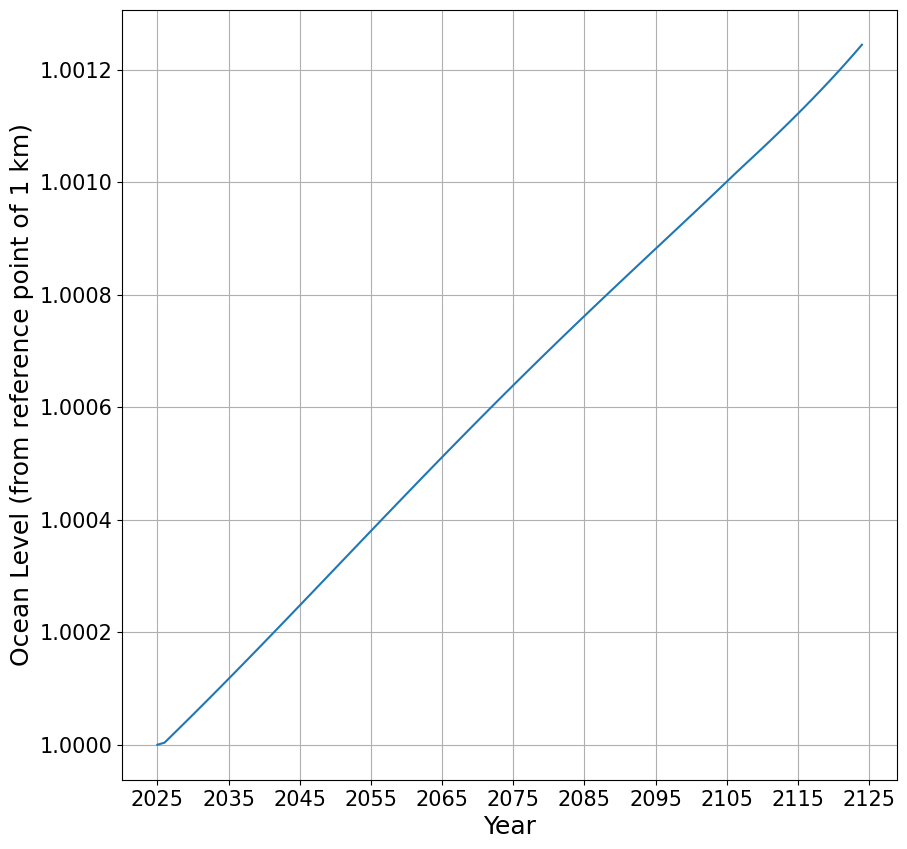

In [58]:
plt.plot(years[0:m], ocean_level[0:m])
plt.xlabel("Year", size = 18);
plt.xticks(range(2025,2135,10), size = 15)
plt.ylabel("Ocean Level (from reference point of 1 km)", size = 18);
plt.yticks(size = 15)
plt.grid()
plt.savefig('ocean') 
plt.show()


In [59]:
# final measurements
print('The final volume of the glacier is', round(sum(sum(glacier_h))*surf_area,3), 'km^3')
print('The final volume of the sea ice is', round(sum(sum(seaice_h))*surf_area,3), 'km^3')
print('The increase in sea level at', int(years[75]), 'is projected to be', round(ocean_level[75]-1,3), 'km')

The final volume of the glacier is 38.856 km^3
The final volume of the sea ice is 0.447 km^3
The increase in sea level at 2100 is projected to be 0.001 km



 time 0


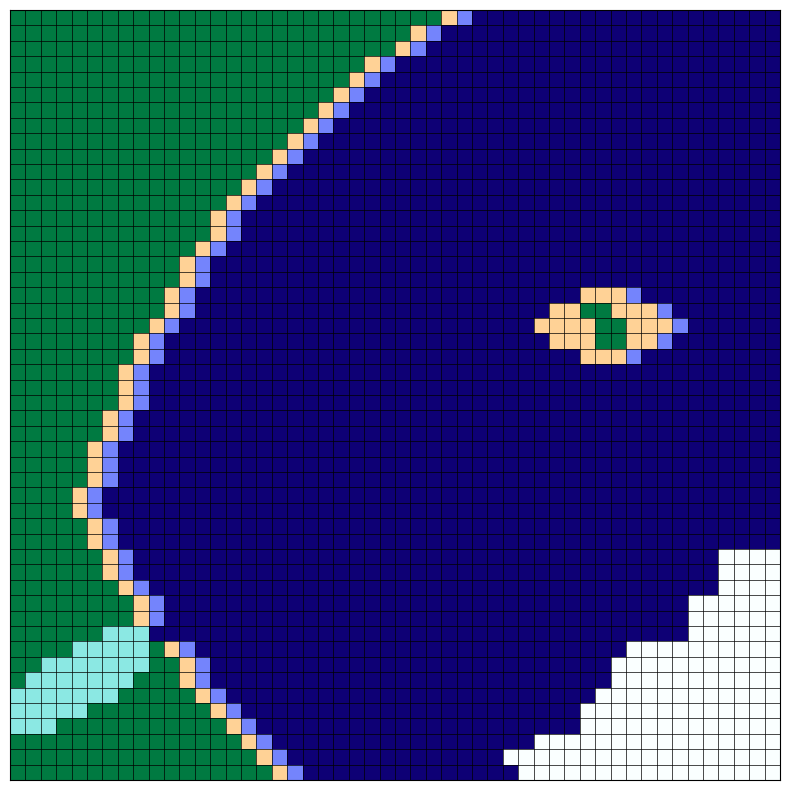

land




time 1


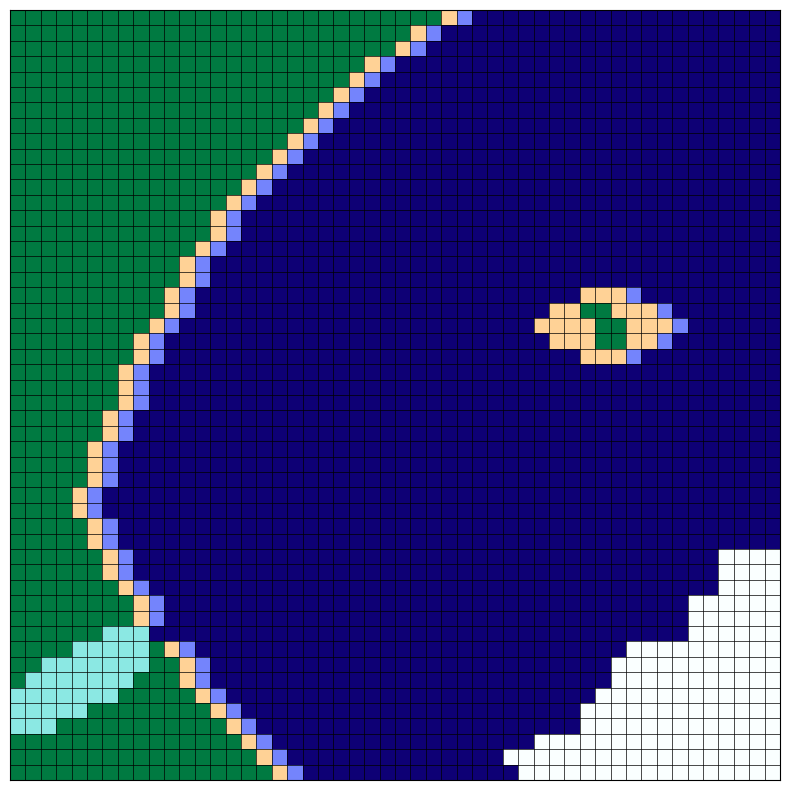

land




time 2


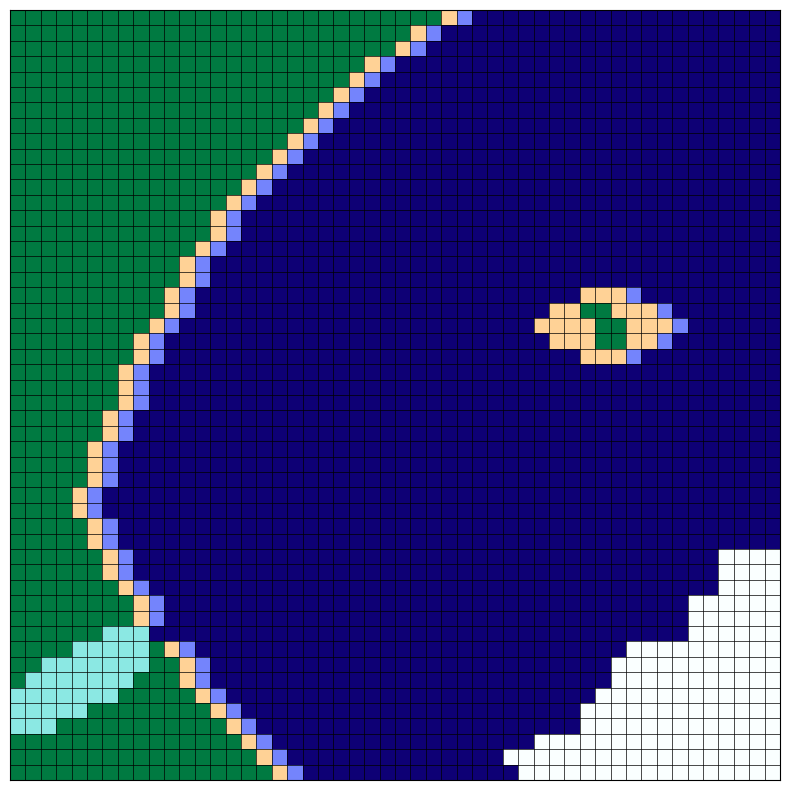

land




time 99


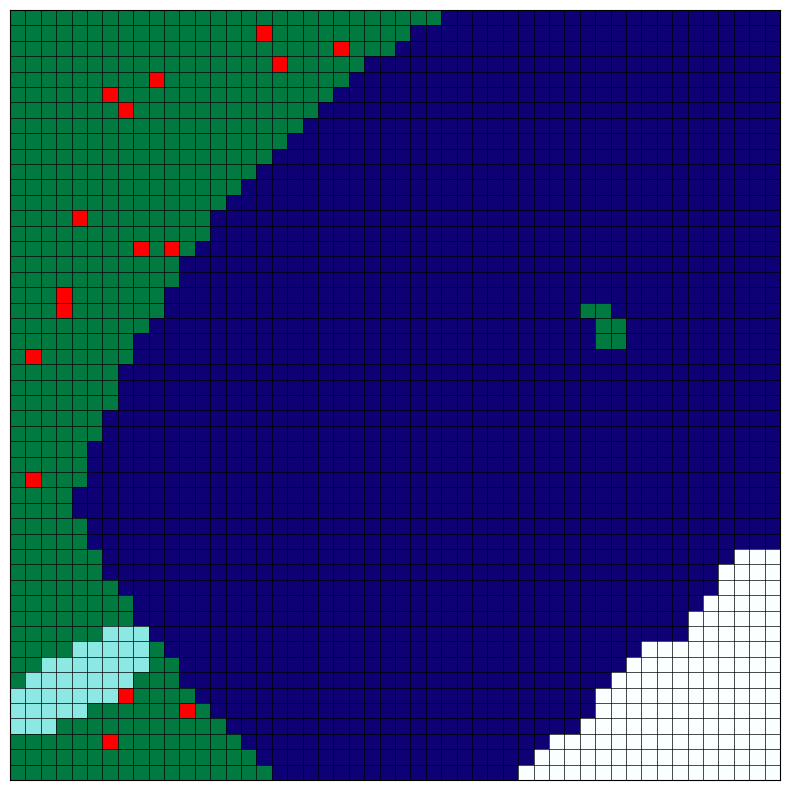

land




time 90


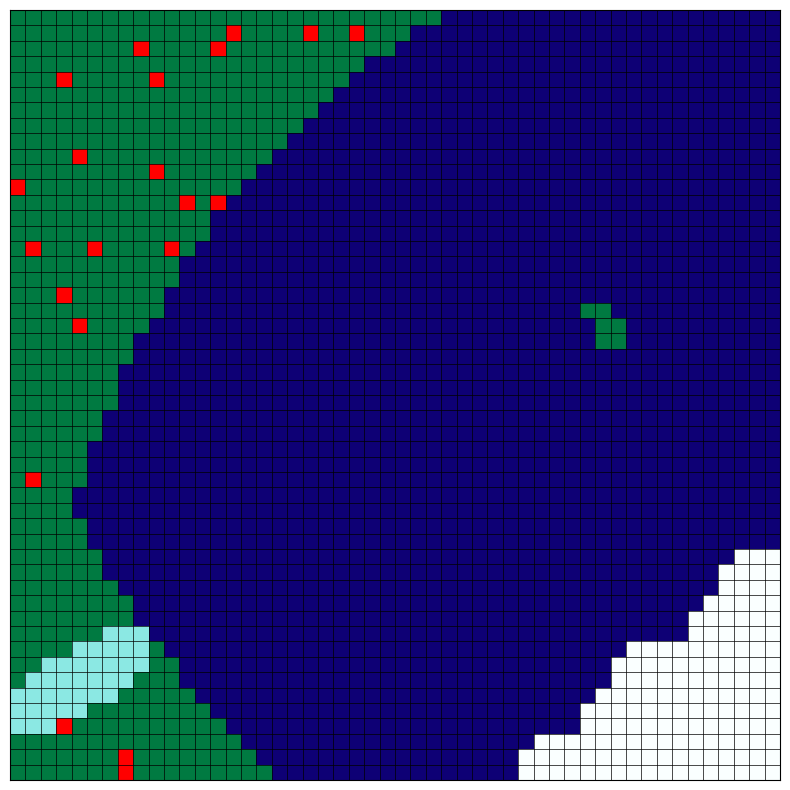

land




time 91


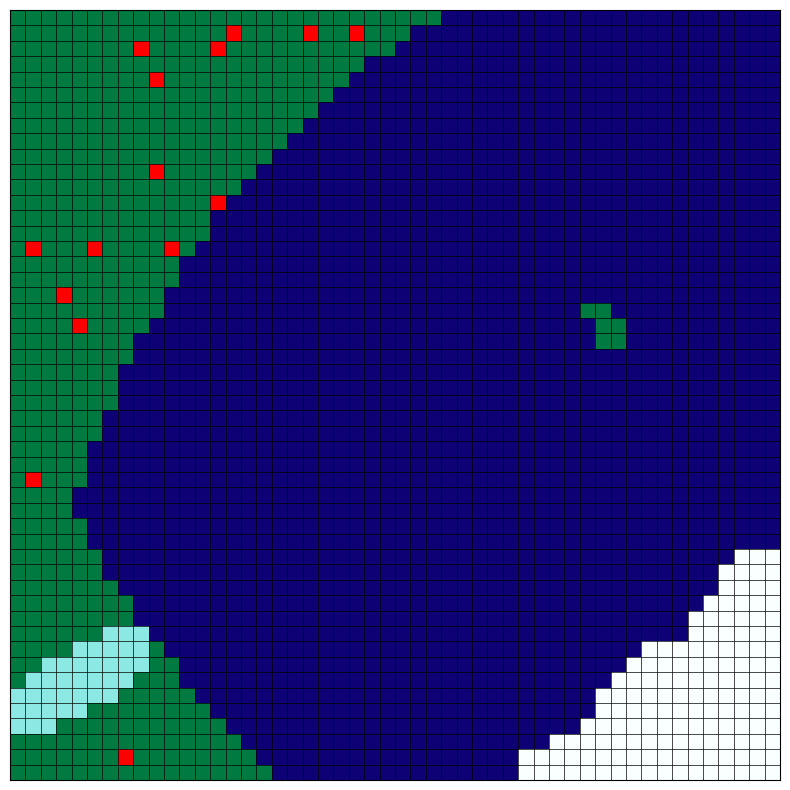

land




time 92


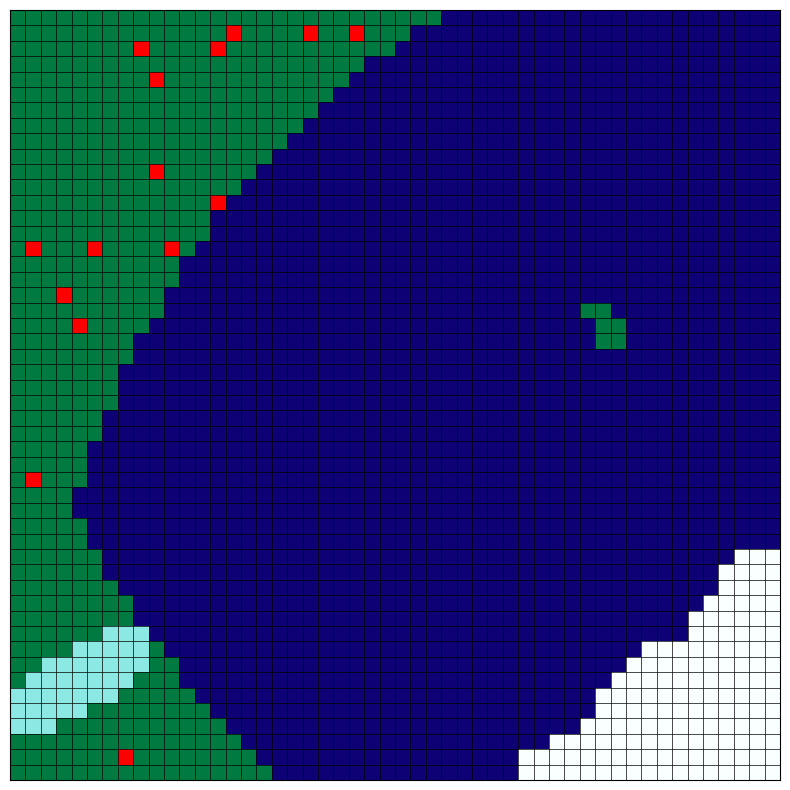

land




time 93


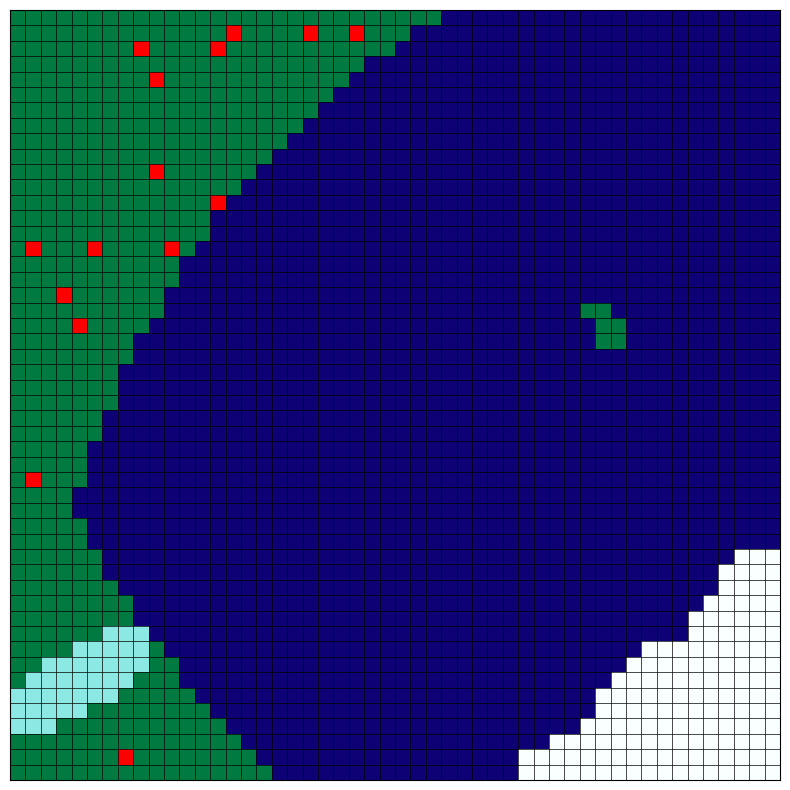

land




time 94


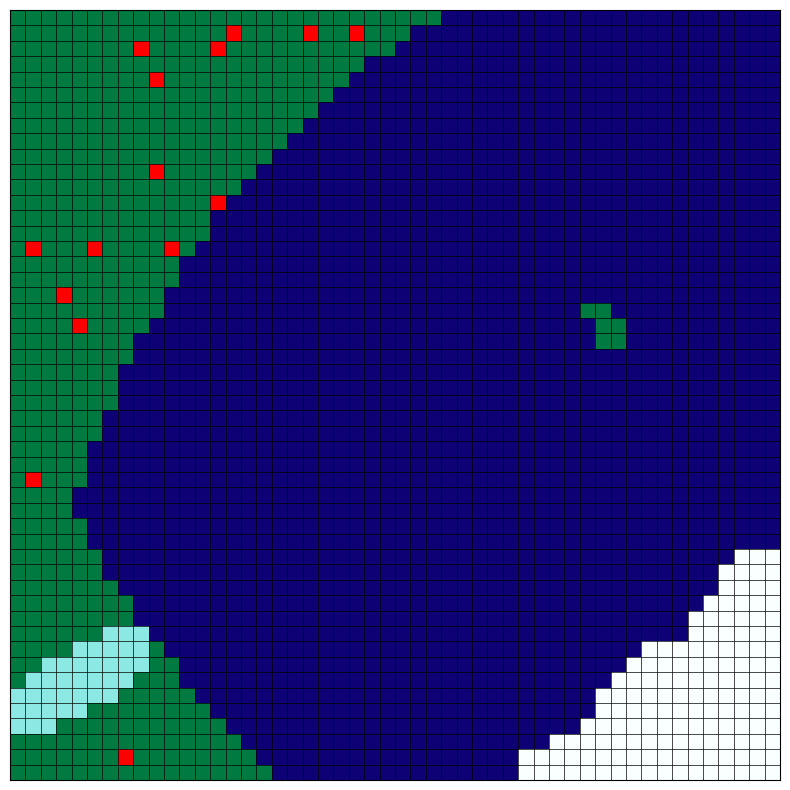

land




time 95


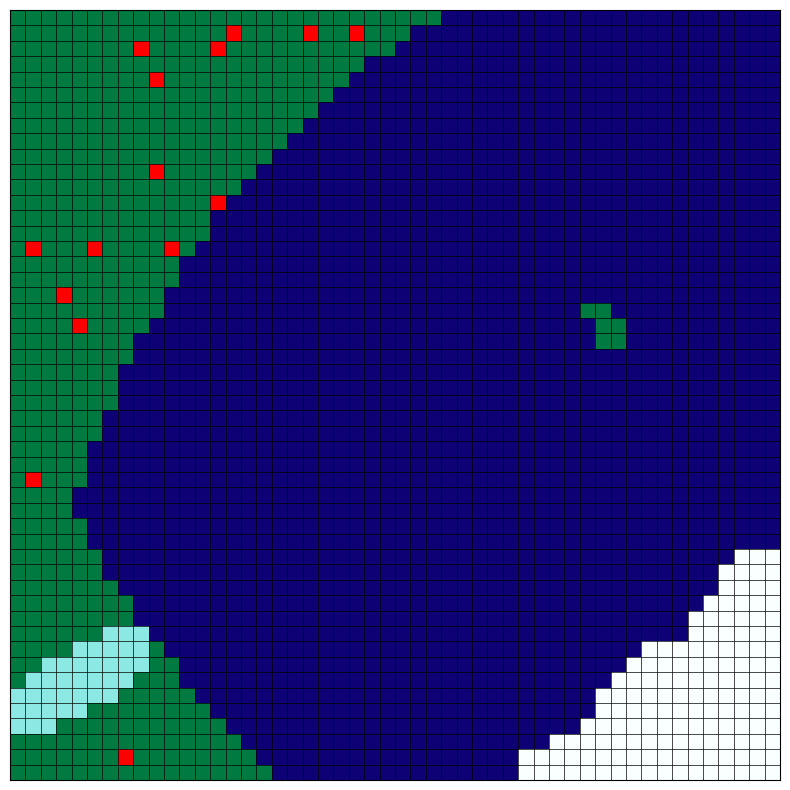

land




time 96


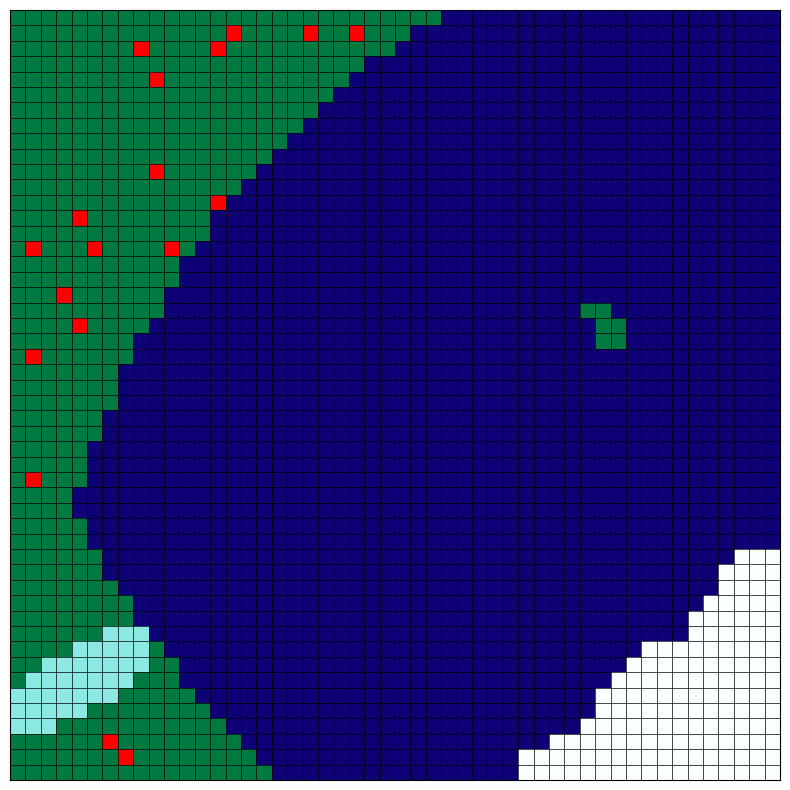

land




time 97


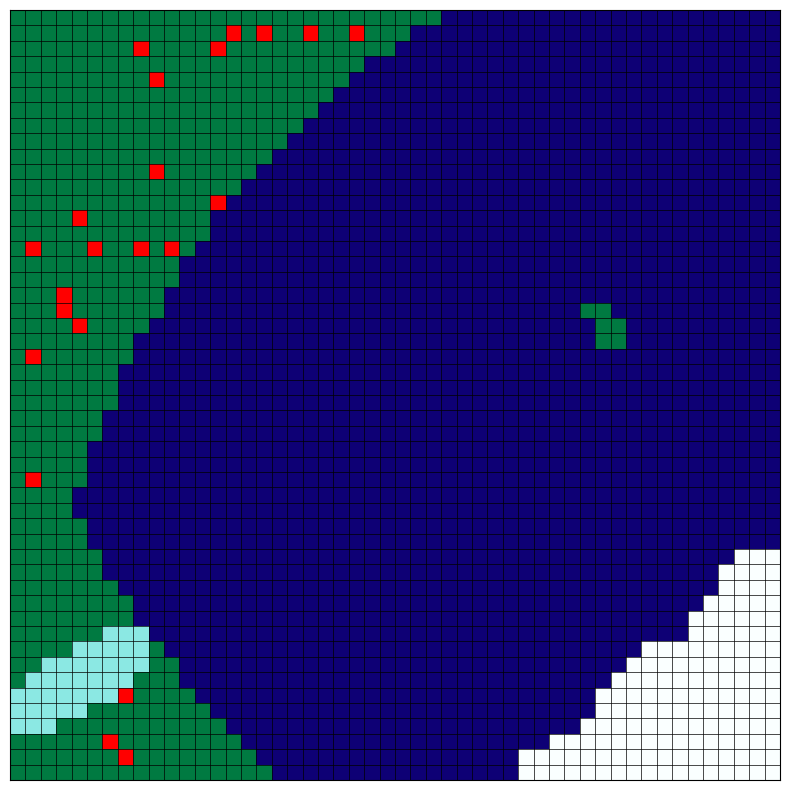

land




time 99


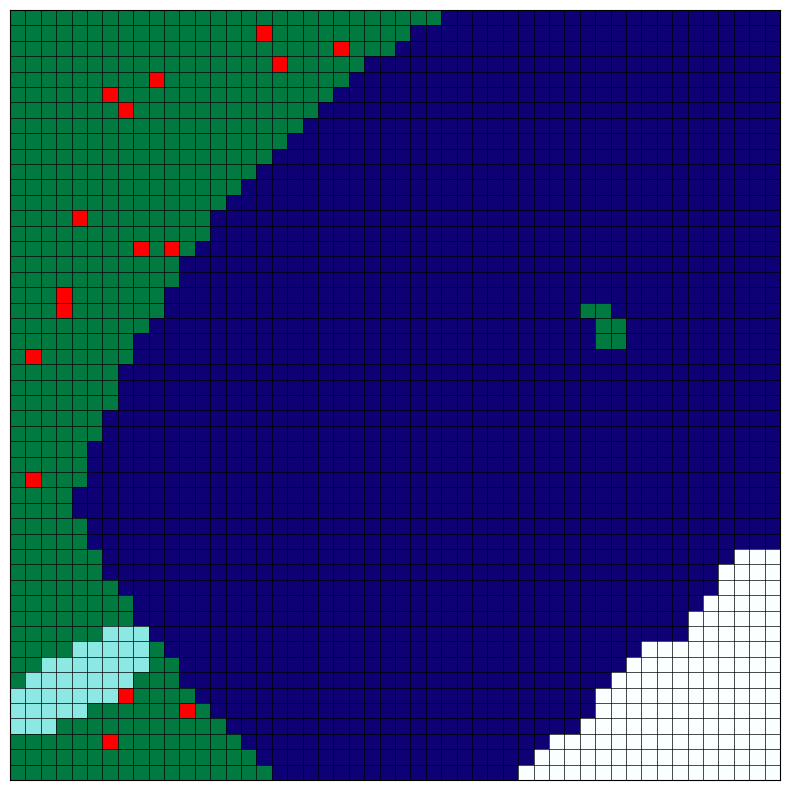

land




time 99


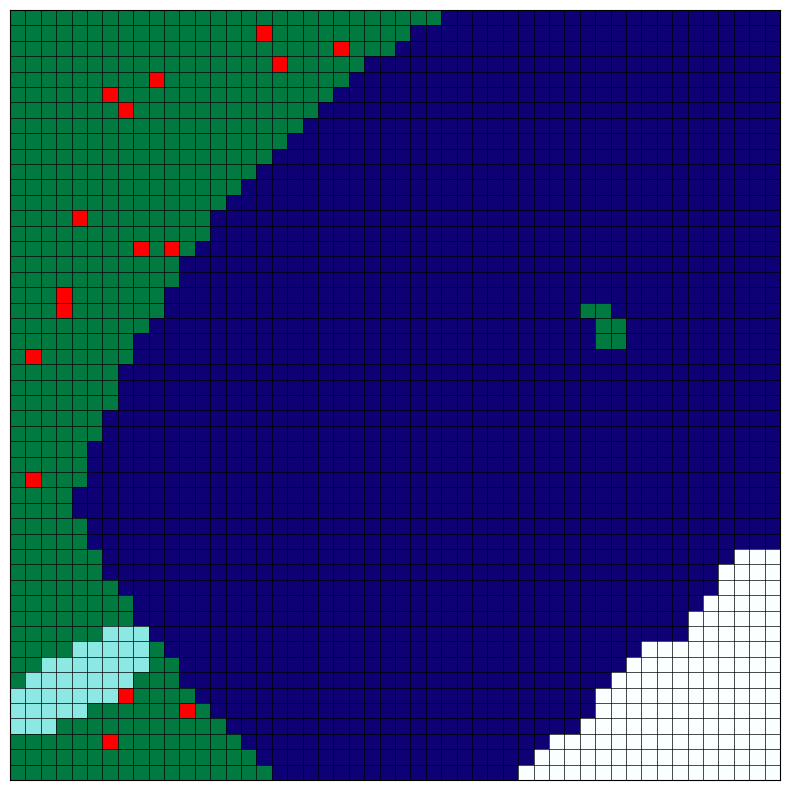

land






In [60]:
# prints the model at specified times time = t
print('\n time 0')
plot_grid(model_over_time[0])
print(what_is_general(model_over_time[0],1,2))
print(''); print('');print(''); print('')

print('time 1')
plot_grid(model_over_time[1])
print(what_is_general(model_over_time[1],1,2))          
print(''); print('');print(''); print('')   

print('time 2')
plot_grid(model_over_time[2])
print(what_is_general(model_over_time[2],1,2))
print(''); print('');print(''); print('')
check_time=99
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=90
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=91
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=92
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=93
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=94
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=95
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=96
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=97
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=99
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=99
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

In [61]:
## Following cells save the model at each time step (change cell format to 'code' to run)

for t in range(50):
    plt.rcParams['figure.figsize'] = [10,10]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(model_over_time[t])

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.5)
    plt.savefig('model at time' + str(t) + '.png') 


for t in range(51,m-1):
    plt.rcParams['figure.figsize'] = [10,10]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(model_over_time[t])

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.5)
    plt.savefig('model at time' + str(t) + '.png') 
